# Divvy_Exercise_Full_Year_Analysis
This analysis is based on the Divvy case study "'Sophisticated, Clear, and Polished’: Divvy and Data Visualization" written by Kevin Hartman (found here: https://artscience.blog/home/divvy-dataviz-case-study). The purpose of this script is to consolidate downloaded Divvy data into a single dataframe and then conduct simple analysis to help answer the key question: “In what ways do members and casual riders use Divvy bikes differently?”

## Import libraries
Import libraries we are going to use for analysis, cleaning, reading datasets, transforming and calculations.

In [1]:
# Pandas deal with datasets as dataframes and make it easier to handle huge amount of data
import pandas as pd
# Numpy is a library that handle arrays and make calculations easier
import numpy as np
# Matplotlib and Seaborn are great tools for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Glob handle multiple files and directories
import glob

In [2]:
# Read every file in "Data" folder (all are .csv)
csv_files = glob.glob("Data/*")

# Create empty list to hold every dataframe
dataframes = []

# Load each dataset as dataframes and put them in dataframes list
for file in csv_files:
    dataframes.append(pd.read_csv(file))

# Concatenate every dataframe into a single, huge dataset
trip_data = pd.concat(dataframes)

In [3]:
# Drop columns we are not going to use in the analysis
trip_data.drop(columns=["start_lat", "start_lng", "end_lat", "end_lng"], inplace=True)

In [4]:
# Change "started_at" and "ended_at" to datetime type
trip_data["started_at"] = pd.to_datetime(trip_data["started_at"])
trip_data["ended_at"] = pd.to_datetime(trip_data["ended_at"])

In [5]:
# Create a new column in the dataset: "ride_length" will be the duration of the trip
trip_data["ride_length"] = trip_data["ended_at"] - trip_data["started_at"]

In [6]:
# Information about the dataset, such as number of rows, datatypes and memory usage
trip_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4460151 entries, 0 to 729594
Data columns (total 11 columns):
 #   Column              Dtype          
---  ------              -----          
 0   ride_id             object         
 1   rideable_type       object         
 2   started_at          datetime64[ns] 
 3   ended_at            datetime64[ns] 
 4   start_station_name  object         
 5   start_station_id    object         
 6   end_station_name    object         
 7   end_station_id      object         
 8   member_casual       object         
 9   day_of_week         int64          
 10  ride_length         timedelta64[ns]
dtypes: datetime64[ns](2), int64(1), object(7), timedelta64[ns](1)
memory usage: 408.3+ MB


In [7]:
# Show the number of rows and columns in the dataset
trip_data.shape

(4460151, 11)

In [8]:
# Show the first five rows of the dataset
trip_data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,day_of_week,ride_length
0,762198876D69004D,docked_bike,2020-07-09 15:22:02,2020-07-09 15:25:52,Ritchie Ct & Banks St,180.0,Wells St & Evergreen Ave,291.0,member,5,0 days 00:03:50
1,BEC9C9FBA0D4CF1B,docked_bike,2020-07-24 23:56:30,2020-07-25 00:20:17,Halsted St & Roscoe St,299.0,Broadway & Ridge Ave,461.0,member,6,0 days 00:23:47
2,D2FD8EA432C77EC1,docked_bike,2020-07-08 19:49:07,2020-07-08 19:56:22,Lake Shore Dr & Diversey Pkwy,329.0,Clark St & Wellington Ave,156.0,casual,4,0 days 00:07:15
3,54AE594E20B35881,docked_bike,2020-07-17 19:06:42,2020-07-17 19:27:38,LaSalle St & Illinois St,181.0,Clark St & Armitage Ave,94.0,casual,6,0 days 00:20:56
4,54025FDC7440B56F,docked_bike,2020-07-04 10:39:57,2020-07-04 10:45:05,Lake Shore Dr & North Blvd,268.0,Clark St & Schiller St,301.0,member,7,0 days 00:05:08


In [9]:
# Count the number of different values in "member_casual" column
trip_data["member_casual"].nunique()

2

In [10]:
# Create new columns for analysis: "day", "month" and "year"
trip_data["day"] = trip_data["started_at"].dt.day
trip_data["month"] = trip_data["started_at"].dt.month
trip_data["year"] = trip_data["started_at"].dt.year

# Change "day_of_week" type to "categorical" with day order
trip_data["day_of_week"] = trip_data["day_of_week"].map({
    1: "segunda",
    2: "terça",
    3: "quarta",
    4: "quinta",
    5: "sexta",
    6: "sábado",
    7: "domingo"
})

trip_data["day_of_week"] = pd.Categorical(trip_data["day_of_week"], ordered=True, categories=["segunda", "terça", "quarta", "quinta", "sexta", "sábado", "domingo"])

In [11]:
# Translating "member_casual" values to portuguese, from "casual" and "member" to "casual" and "membro"
trip_data["member_casual"] = trip_data["member_casual"].map({
    "casual": "casual",
    "member": "membro"
})

In [12]:
# Create new column "ride_length_in_seconds"
trip_data["ride_length_in_seconds"] = trip_data["ride_length"].dt.total_seconds()

In [13]:
# Removing trip data where bikes were going for maintenance and trip data with negative duration
trip_data_v2 = trip_data[~((trip_data["start_station_name"] == "HQ QR") | (trip_data["ride_length_in_seconds"] < 0))]

In [14]:
# Show the summary of the data
trip_data_v2["ride_length"].describe()

count                      4450279
mean     0 days 00:26:17.786032740
std      0 days 04:01:33.545769888
min                0 days 00:00:00
25%                0 days 00:07:33
50%                0 days 00:13:40
75%                0 days 00:25:11
max               38 days 20:24:09
Name: ride_length, dtype: object

In [15]:
# Show the most common day of the trips
print(trip_data_v2["day_of_week"].mode())

0    domingo
Name: day_of_week, dtype: category
Categories (7, object): ['segunda' < 'terça' < 'quarta' < 'quinta' < 'sexta' < 'sábado' < 'domingo']


In [16]:
# Show the five top rows of the new dataset
trip_data_v2.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,day_of_week,ride_length,day,month,year,ride_length_in_seconds
0,762198876D69004D,docked_bike,2020-07-09 15:22:02,2020-07-09 15:25:52,Ritchie Ct & Banks St,180.0,Wells St & Evergreen Ave,291.0,membro,sexta,0 days 00:03:50,9,7,2020,230.0
1,BEC9C9FBA0D4CF1B,docked_bike,2020-07-24 23:56:30,2020-07-25 00:20:17,Halsted St & Roscoe St,299.0,Broadway & Ridge Ave,461.0,membro,sábado,0 days 00:23:47,24,7,2020,1427.0
2,D2FD8EA432C77EC1,docked_bike,2020-07-08 19:49:07,2020-07-08 19:56:22,Lake Shore Dr & Diversey Pkwy,329.0,Clark St & Wellington Ave,156.0,casual,quinta,0 days 00:07:15,8,7,2020,435.0
3,54AE594E20B35881,docked_bike,2020-07-17 19:06:42,2020-07-17 19:27:38,LaSalle St & Illinois St,181.0,Clark St & Armitage Ave,94.0,casual,sábado,0 days 00:20:56,17,7,2020,1256.0
4,54025FDC7440B56F,docked_bike,2020-07-04 10:39:57,2020-07-04 10:45:05,Lake Shore Dr & North Blvd,268.0,Clark St & Schiller St,301.0,membro,domingo,0 days 00:05:08,4,7,2020,308.0


In [17]:
# Create a pivot table that shows the average trip duration (in seconds) for every rider type and week day
trip_data_v2_pivot = trip_data_v2.pivot_table(index="member_casual", columns="day_of_week", values="ride_length_in_seconds", aggfunc=np.mean)
trip_data_v2_pivot

day_of_week,segunda,terça,quarta,quinta,sexta,sábado,domingo
member_casual,,,,,,,
casual,2820.95251,2375.107532,2171.990982,2215.709979,2221.265033,2351.029545,2612.940988
membro,1026.84376,875.718031,857.285589,864.201789,855.040123,897.713234,996.517980


In [18]:
# Show statistics for every rider type: average, median, min and max values
print(trip_data_v2.groupby("member_casual")["ride_length_in_seconds"].mean())
print(trip_data_v2.groupby("member_casual")["ride_length_in_seconds"].median())
print(trip_data_v2.groupby("member_casual")["ride_length_in_seconds"].min())
print(trip_data_v2.groupby("member_casual")["ride_length_in_seconds"].max())

member_casual
casual    2454.237415
membro     908.871871
Name: ride_length_in_seconds, dtype: float64
member_casual
casual    1155.0
membro     648.0
Name: ride_length_in_seconds, dtype: float64
member_casual
casual    0.0
membro    0.0
Name: ride_length_in_seconds, dtype: float64
member_casual
casual    3356649.0
membro    2005282.0
Name: ride_length_in_seconds, dtype: float64


In [19]:
# Create a new table that shows the number of trips, grouped by week day and rider type
trip_data_v2_count_trips = trip_data_v2.groupby(["day_of_week", "member_casual"])["ride_id"].count().reset_index()
# Rename the column with the number of trips
trip_data_v2_count_trips.rename(columns={
    "ride_id": "number_of_trips"
}, inplace=True)
trip_data_v2_count_trips

,day_of_week,member_casual,number_of_trips
0,segunda,casual,366054
1,segunda,membro,322523
2,terça,casual,209137
3,terça,membro,336810
4,quarta,casual,203934
5,quarta,membro,363607
6,quinta,casual,215333
7,quinta,membro,388301
8,sexta,casual,212287
9,sexta,membro,363082


In [20]:
# Create a new table that shows the average trip duration, grouped by week day and rider type
trip_data_v2_mean_time = trip_data_v2.groupby(["day_of_week", "member_casual"])["ride_length_in_seconds"].mean().reset_index()
# Rename the column with the mean time
trip_data_v2_mean_time.rename(columns={
    "ride_length_in_seconds": "ride_length_average_in_seconds"
}, inplace=True)
trip_data_v2_mean_time

,day_of_week,member_casual,ride_length_average_in_seconds
0,segunda,casual,2820.952510
1,segunda,membro,1026.843760
2,terça,casual,2375.107532
3,terça,membro,875.718031
4,quarta,casual,2171.990982
5,quarta,membro,857.285589
6,quinta,casual,2215.709979
7,quinta,membro,864.201789
8,sexta,casual,2221.265033
9,sexta,membro,855.040123


In [21]:
# Join the datasets of mean time and number of trips
trip_data_v2_count_trips_and_mean_time = trip_data_v2_count_trips.merge(trip_data_v2_mean_time, on=["day_of_week", "member_casual"])
# Round the average time to 2 decimals
trip_data_v2_count_trips_and_mean_time["ride_length_average_in_seconds"] = trip_data_v2_count_trips_and_mean_time["ride_length_average_in_seconds"].round(decimals=2)
trip_data_v2_count_trips_and_mean_time

,day_of_week,member_casual,number_of_trips,ride_length_average_in_seconds
0,segunda,casual,366054,2820.95
1,segunda,membro,322523,1026.84
2,terça,casual,209137,2375.11
3,terça,membro,336810,875.72
4,quarta,casual,203934,2171.99
5,quarta,membro,363607,857.29
6,quinta,casual,215333,2215.71
7,quinta,membro,388301,864.20
8,sexta,casual,212287,2221.27
9,sexta,membro,363082,855.04


## Data visualization

Text(0.5, 1.0, 'Ride length average by rider type')

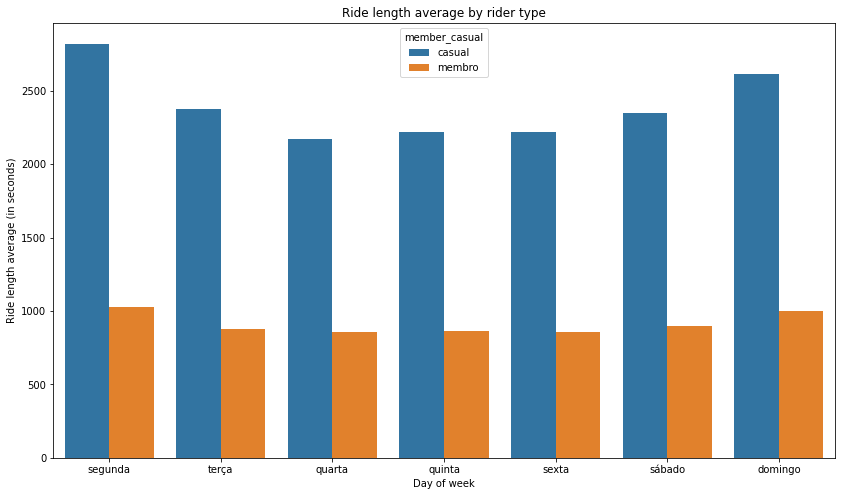

In [22]:
# Create a figure and set the size desired
fig = plt.figure(figsize=(14, 8))
# Create a bar plot
sns.barplot(data=trip_data_v2_mean_time, x="day_of_week", y="ride_length_average_in_seconds", hue="member_casual")
# Set the labels and title
plt.xlabel("Day of week")
plt.ylabel("Ride length average (in seconds)")
plt.title("Ride length average by rider type")

Text(0.5, 1.0, 'Number of trips by rider type')

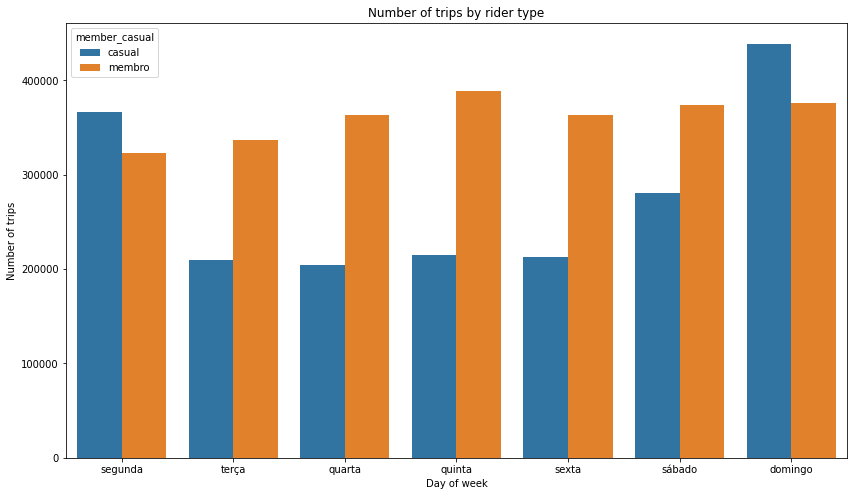

In [23]:
# Create a figure and set the size desired
fig = plt.figure(figsize=(14, 8))
# Create a bar plot
sns.barplot(data=trip_data_v2_count_trips, x="day_of_week", y="number_of_trips", hue="member_casual")
# Set the labels and title
plt.ylabel("Number of trips")
plt.xlabel("Day of week")
plt.title("Number of trips by rider type")

In [24]:
# Save the dataframe to a new dataset in CSV format
trip_data_v2_count_trips_and_mean_time.to_csv("trip_data_count_trips_and_mean_time.csv")